## Introduction to the datasets
The Premier League, formed on May 27, 1992, as a breakaway league from the original Football League, was primarily motivated by financial reasons. The establishment of the Premier League brought about lucrative TV deals and improved distribution of money, benefiting the participating clubs. With increased financial resources, the league attracted top coaches and players, leading to a rise in the overall quality of the competition and enhancing its marketability.

For this project, we have access to several datasets located in the data/ folder, which provide valuable information for analysis and exploration:

- results.csv: This dataset contains detailed information about all the Premier League results from the 2006/07 season to the 2017/18 season.
- stats.csv: The dataset expands on statistical categories that are officially recognized by the Premier League, offering a deeper analysis of various performance metrics.
EPL standings 2000-2022.csv: This dataset presents the standings of individual teams throughout the seasons from 2000 to 2022.
- with_goalscorers.csv: This dataset provides data on the top goalscorers in the Premier League since its formation in 1992.  

Acquiring, cleaning, and exploring the data will be necessary to gain insights and identify patterns. Additionally, visualization techniques will help in presenting the data effectively. Preparing and modeling the data using linear regression will enable us to answer specific questions related to the project.

The original datasets are located as follows :
- [results.csv and stats.csv](https://www.kaggle.com/datasets/zaeemnalla/premier-league)
- [EPL standings 2000-2022.csv](https://www.kaggle.com/datasets/quadeer15sh/premier-league-standings-11-seasons-20102021)
- [with_goalscorers.csv](https://fbref.com/en/comps/9/history/Premier-League-Seasons)

## Problem statement 
The goal of this analysis is to develop a linear regression model that can predict the number of wins a team will achieve in the Premier League based on various factors. By identifying the most important variables that influence a team's success, we can gain valuable insights into what it takes to become a champion in one of the world's most competitive football leagues.

## Overview of the datasets :
All data will be formatted up until from 06/07 until 17/18 season to unify the data timeframe.\
**results.csv** boasts the following columns: 
- home_team - The team that played at their own stadium
- away_team - the opposition of the home team
- home_goals - the goals scored by the home team 
- away_gols - the goals scored for the away team
- result - can hold 'H' which indicates a home win, 'D' which indicates a Draw and 'A' which indicates an away win
- season - specifies the season which the match occured in

**stats.csv** is a little trickier as it has 42 columns and you can check them out [here](https://www.kaggle.com/datasets/zaeemnalla/premier-league?select=stats.csv)

**standings.csv** has the following: 
- Season - the season for which the other data is for 
- Pos - the position in which the team finished in the standings
- Team - the name of the team
- Pld - the amount of games played in that year (constant 38)
- W - amount of games won
- D - amount of games drawn
- L - amount of games lost
- GF - goals for the team
- GA - goals against
- GD  - GF minus GA 
- Pts - points that the team has had in the season (3 pts for a win, 1 pt for a draw , 0 for a loss)
- Qualification or relegation - whether or not the team has qualified for a European competition during the season or has been relegated from the PL

**with_goalscorers.csv** has some repetitive columns but the one that concern us in this dataset is : 
- Top scorer - the name of the top goalscorer with the number being the goals scored and the text in the brackets is the team for which he scored them



## Imports

In [452]:
%matplotlib inline

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nose.tools import *

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Overview of the datasets :
All data will be formatted up until from 06/07 until 17/18 season to unify the data timeframe.\
**results.csv** boasts the following columns: 
- home_team - The team that played at their own stadium
- away_team - the opposition of the home team
- home_goals - the goals scored by the home team 
- away_gols - the goals scored for the away team
- result - can hold 'H' which indicates a home win, 'D' which indicates a Draw and 'A' which indicates an away win
- season - specifies the season which the match occured in

**stats.csv** is a little trickier as it has 42 columns and you can check them out [here](https://www.kaggle.com/datasets/zaeemnalla/premier-league?select=stats.csv)

**standings.csv** has the following: 
- Season - the season for which the other data is for 
- Pos - the position in which the team finished in the standings
- Team - the name of the team
- Pld - the amount of games played in that year (constant 38)
- W - amount of games won
- D - amount of games drawn
- L - amount of games lost
- GF - goals for the team
- GA - goals against
- GD  - GF minus GA 
- Pts - points that the team has had in the season (3 pts for a win, 1 pt for a draw , 0 for a loss)
- Qualification or relegation - whether or not the team has qualified for a European competition during the season or has been relegated from the PL

**with_goalscorers.csv** has some repetitive columns but the one that concern us in this dataset is : 
- Top scorer - the name of the top goalscorer with the number being the goals scored and the text in the brackets is the team for which he scored them



## Data collection

In [454]:
league_data = pd.read_csv("data/results.csv")
stats = pd.read_csv('data/stats.csv')
standings = pd.read_csv('data/EPL Standings 2000-2022.csv')
with_goalscorers = pd.read_csv('data/with_goalscorers.csv')

In [455]:
assert_is_not_none(league_data)
assert_is_not_none(stats)
assert_is_not_none(standings)
assert_is_not_none(with_goalscorers)

## Data cleaning and preprocessing

Let's start by exploring the data we have obtained.

In [456]:
league_data

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


Let's check the data types to see if we have any issues.

In [457]:
league_data.dtypes

home_team      object
away_team      object
home_goals    float64
away_goals    float64
result         object
season         object
dtype: object

In [458]:
expected_columns = ['home_team', 'away_team', 'home_goals', 'away_goals', 'result', 'season']
expected_shape = (4560, 6)

In [459]:
assert_equal(list(league_data.columns), expected_columns)
assert_equal(league_data.shape, expected_shape)

Now that we have successfully read the data and confirmed the data types, let's move on to analyzing the standings. However, before we proceed, it's important to note that the timeframe of the data is not unified. We will focus on grouping the standings specifically from the 2006/07 season until the 2017/18 season.

In [460]:
new_standings = standings[standings['Season'].between('2006-07','2017-18')]

We have now unified the data timeframe and we can take a look at the champions of all the seasons we are observing.

In [461]:
new_standings[new_standings.Pos == 1]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
120,2006-07,1,Manchester United,38,28,5,5,83,27,56,89,Qualification for the Champions League group s...
140,2007-08,1,Manchester United,38,27,6,5,80,22,58,87,Qualification for the Champions League group s...
160,2008-09,1,Manchester United,38,28,6,4,68,24,44,90,Qualification for the Champions League group s...
180,2009-10,1,Chelsea,38,27,5,6,103,32,71,86,Qualification for the Champions League group s...
200,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
220,2011-12,1,Manchester City,38,28,5,5,93,29,64,89,Qualification for the Champions League group s...
240,2012-13,1,Manchester United,38,28,5,5,86,43,43,89,Qualification for the Champions League group s...
260,2013-14,1,Manchester City,38,27,5,6,102,37,65,86,Qualification for the Champions League group s...
280,2014-15,1,Chelsea,38,26,9,3,73,32,41,87,Qualification for the Champions League group s...
300,2015-16,1,Leicester City,38,23,12,3,68,36,32,81,Qualification for the Champions League group s...


In [462]:
new_standings.dtypes

Season                         object
Pos                             int64
Team                           object
Pld                             int64
W                               int64
D                               int64
L                               int64
GF                              int64
GA                              int64
GD                              int64
Pts                             int64
Qualification or relegation    object
dtype: object

In [463]:
new_standings.reset_index(drop=True,inplace=True)

We won't be looking into qualification for the European competitions or relegation to the second tier, therefore we can drop the Qualification or relegation column.

In [464]:
new_standings = new_standings.drop('Qualification or relegation',axis=1)

In [465]:
new_standings

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,2006-07,1,Manchester United,38,28,5,5,83,27,56,89
1,2006-07,2,Chelsea,38,24,11,3,64,24,40,83
2,2006-07,3,Liverpool,38,20,8,10,57,27,30,68
3,2006-07,4,Arsenal,38,19,11,8,63,35,28,68
4,2006-07,5,Tottenham Hotspur,38,17,9,12,57,54,3,60
...,...,...,...,...,...,...,...,...,...,...,...
235,2017-18,16,Huddersfield Town,38,9,10,19,28,58,-30,37
236,2017-18,17,Southampton,38,7,15,16,37,56,-19,36
237,2017-18,18,Swansea City,38,8,9,21,28,56,-28,33
238,2017-18,19,Stoke City,38,7,12,19,35,68,-33,33


In [466]:
assert_equal(new_standings.shape, (240, 11))

Standings looking good! Let's move on to the goalscorers.

In [467]:
with_goalscorers

,Season,Competition Name,# Squads,Champion,Top Scorer
0,2022-2023,Premier League,20,NaN,Rodrigo - 3(Leeds United)
1,2021-2022,Premier League,20,Manchester City,Son Heung-min Mohamed Salah - 23(Tottenham Hot...
2,2020-2021,Premier League,20,Manchester City,Harry Kane - 23(Tottenham Hotspur)
3,2019-2020,Premier League,20,Liverpool,Jamie Vardy - 23(Leicester City)
4,2018-2019,Premier League,20,Manchester City,Pierre-Emerick Aubameyang Sadio Mané... - 22(A...
5,2017-2018,Premier League,20,Manchester City,Mohamed Salah - 32(Liverpool)
6,2016-2017,Premier League,20,Chelsea,Harry Kane - 29(Tottenham)
7,2015-2016,Premier League,20,Leicester City,Harry Kane - 25(Tottenham)
8,2014-2015,Premier League,20,Chelsea,Sergio Agüero - 26(Manchester City)
9,2013-2014,Premier League,20,Manchester City,Luis Suárez - 31(Liverpool)


In this section, we encounter two challenges that require attention.
Firstly, we find that the 'Top scorer' column contains excessive information. To address this, we will extract specific data from this column, such as the number of goals scored and the corresponding team the player was playing for.
Secondly, we need to ensure the data is consistent across time. As the dataset spans from the formation of the Premier League until the present, we will focus on unifying the data by selecting a specific time range for our analysis.

In [469]:
with_goalscorers[['Top Scorer Goals', 'Top Scorer Team']] = with_goalscorers['Top Scorer'].str.extract(r'(\d+)\((.*?)\)$')
with_goalscorers.drop('Top Scorer', axis=1, inplace=True)

Regex used can be explained as follows:

(\d+): This part captures one or more digits (\d+) and uses parentheses to create a capturing group. It is used to extract the goals scored by the top scorer.  

\\\(: This matches the opening parenthesis character "(".  

\\\(.*?): This part captures any character (.) zero or more times (*) non-greedily (?) and creates a capturing group. It is used to extract the team name of the top scorer.  

\\\)$: This matches the closing parenthesis character ")" at the end of the string.

In [470]:
with_goalscorers

,Season,Competition Name,# Squads,Champion,Top Scorer Goals,Top Scorer Team
0,2022-2023,Premier League,20,NaN,3,Leeds United
1,2021-2022,Premier League,20,Manchester City,23,Tottenham Hotspur Liverpool
2,2020-2021,Premier League,20,Manchester City,23,Tottenham Hotspur
3,2019-2020,Premier League,20,Liverpool,23,Leicester City
4,2018-2019,Premier League,20,Manchester City,22,Arsenal Liverpool
5,2017-2018,Premier League,20,Manchester City,32,Liverpool
6,2016-2017,Premier League,20,Chelsea,29,Tottenham
7,2015-2016,Premier League,20,Leicester City,25,Tottenham
8,2014-2015,Premier League,20,Chelsea,26,Manchester City
9,2013-2014,Premier League,20,Manchester City,31,Liverpool


Let's check the datatypes of the dataframe.

In [471]:
with_goalscorers.dtypes

Season              object
Competition Name    object
# Squads             int64
Champion            object
Top Scorer Goals    object
Top Scorer Team     object
dtype: object

Goals needs to be an integer.

In [472]:
with_goalscorers['Top Scorer Goals'] = with_goalscorers['Top Scorer Goals'].astype(int)

We can drop the number of squads in the PL because they don't change for the period that we are observing.

In [473]:
with_goalscorers.drop('# Squads',axis = 1,inplace=True)

Next, we will unify the data into one timeframe, specifically from the 2006/07 season to the 2017/18 season. This will allow us to have a consistent and relevant dataset for our analysis.

In [474]:
with_goalscorers_sorted = with_goalscorers[with_goalscorers.Season.between('2006-2007','2017-2018')]

In [475]:
assert_equal(with_goalscorers_sorted.shape, (12, 5))

Now let's move on to the large dataset, which is the stats dataset. We need to first check if there are any missing values (N/A) in the dataset.

In [476]:
stats.isna().any()

team                    False
wins                    False
losses                  False
goals                   False
total_yel_card          False
total_red_card          False
total_scoring_att       False
ontarget_scoring_att    False
hit_woodwork            False
att_hd_goal             False
att_pen_goal            False
att_freekick_goal       False
att_ibox_goal           False
att_obox_goal           False
goal_fastbreak          False
total_offside           False
clean_sheet             False
goals_conceded          False
saves                    True
outfielder_block        False
interception            False
total_tackle            False
last_man_tackle         False
total_clearance         False
head_clearance           True
own_goals               False
penalty_conceded        False
pen_goals_conceded      False
total_pass              False
total_through_ball       True
total_long_balls        False
backward_pass            True
total_cross             False
corner_tak

Upon inspecting the "stats" dataset, we noticed that the columns "head_clearance," "saves," "dispossessed," and "total_through_ball" contain N/A values. These missing values correspond to the 2006/2007 season when the Premier League didn't record these metrics, but they started counting them in the following seasons. Since these variables are not directly relevant to our research, we can safely drop them from the dataset.

We also noticed that the columns "backward_pass" and "big_chance_missed" are recorded starting from the 2009-10 season. Since these variables are not directly relevant to our research, we can drop them along with the previously mentioned columns that contain N/A values.

In [477]:
stats[stats.dispossessed.isna()] #example how N/A values were checked; how we made the observations above

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


In [478]:
stats.drop(['head_clearance','saves','dispossessed','total_through_ball','backward_pass','big_chance_missed'],axis=1,inplace=True)

In [479]:
assert_equal(stats.shape, (240, 36))

Obligatory check for N/A values in league_data.

In [480]:
league_data.isna().any()

home_team     False
away_team     False
home_goals    False
away_goals    False
result        False
season        False
dtype: bool

Earlier we looked at the champions during the observed period. Let's save that as a variable.

In [481]:
champions = new_standings[new_standings.Pos==1]

In [482]:
champions.reset_index(drop=True,inplace=True)

In [483]:
champions

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,2006-07,1,Manchester United,38,28,5,5,83,27,56,89
1,2007-08,1,Manchester United,38,27,6,5,80,22,58,87
2,2008-09,1,Manchester United,38,28,6,4,68,24,44,90
3,2009-10,1,Chelsea,38,27,5,6,103,32,71,86
4,2010-11,1,Manchester United,38,23,11,4,78,37,41,80
5,2011-12,1,Manchester City,38,28,5,5,93,29,64,89
6,2012-13,1,Manchester United,38,28,5,5,86,43,43,89
7,2013-14,1,Manchester City,38,27,5,6,102,37,65,86
8,2014-15,1,Chelsea,38,26,9,3,73,32,41,87
9,2015-16,1,Leicester City,38,23,12,3,68,36,32,81


In [485]:
assert_equal(champions.shape, (12, 11))
assert_is_not_none(champions)
assert_is_not_none(stats)
assert_is_not_none(with_goalscorers_sorted)
assert_is_not_none(league_data)
assert_is_not_none(new_standings)
assert_equal(with_goalscorers_sorted.columns.tolist(), ['Season', 'Competition Name', 'Champion', 'Top Scorer Goals','Top Scorer Team'])

## Exploratory Data Analysis (EDA)

What insights can we gain from the data through Exploratory Data Analysis (EDA)? Here are some questions to consider:

### Which team scored the most goals in one season during these 11 seasons?

In [376]:
most_goals_season = stats.loc[stats.goals.idxmax()][['team', 'goals', 'season']]
print(most_goals_season)

team      Manchester City
goals               106.0
season          2017-2018
Name: 220, dtype: object


Manchester City scored 106 goals during the 2017-18 season in which, as we will see in the below code, they also were champions.

### Which team scored the most goals and didn't become champion?

Firstly, we need to get all teams throughout the seasons which didn't become champions.

In [487]:
non_champions = new_standings[new_standings['Pos'] != 1]
non_champions.reset_index(drop=True, inplace=True)

Then we sort by the goals scored to answer our question.

In [491]:
most_goals_non_champion = non_champions.nlargest(1, 'GF')
print(most_goals_non_champion[['Team', 'GF', 'Season','Pts']])

          Team   GF   Season  Pts
133  Liverpool  101  2013-14   84


Impressive! Liverpool scored a remarkable 101 goals during the 2013-2014 season but still didn't become champions! Now, let's determine the number of teams that won the league with fewer goals scored than Liverpool in the 2013-2014 season.

In [489]:
champions_scored_less_liverpool = champions[champions['GF'] < non_champions['GF'].max()]
champions_scored_less_liverpool.shape[0]

9

Out of the 12 seasons analyzed, only three title-winning teams managed to score more goals than Liverpool did in the 2013-2014 season, during which Liverpool didn't even win the title! Let's take a look at the three teams that achieved this remarkable feat.

In [490]:
champions_scored_more = champions[champions.GF>non_champions.GF.max()]
print(champions_scored_more)

     Season  Pos             Team  Pld   W  D  L   GF  GA  GD  Pts
3   2009-10    1          Chelsea   38  27  5  6  103  32  71   86
7   2013-14    1  Manchester City   38  27  5  6  102  37  65   86
11  2017-18    1  Manchester City   38  32  4  2  106  27  79  100


Indeed, the 2013-2014 season serves as a compelling example that winning the title is not solely determined by the number of goals scored. Despite Liverpool scoring more goals than nine of the observed 12 champions, Manchester City managed to secure the title with just one more goal and more points than Liverpool. This observation suggests that there might be other significant factors at play that influence a team's ability to become champions. To identify these crucial factors, we'll delve deeper into the data through exploratory data analysis.

### How many times a team has won the title with them having the top goalscorer?

To answer this question we first need to sort the goalscorers by season.

In [492]:
with_goalscorers_sorted = with_goalscorers.copy() # To avoid a warning
with_goalscorers_sorted.sort_values(by='Season', inplace=True)
with_goalscorers_sorted.reset_index(drop=True, inplace=True)

In [493]:
with_goalscorers_sorted

,Season,Competition Name,Champion,Top Scorer Goals,Top Scorer Team
0,1992-1993,FA Premier League,Manchester United,22,Tottenham Hotspur
1,1993-1994,FA Premier League,Manchester United,34,Newcastle United
2,1994-1995,FA Premier League,Blackburn Rovers,34,Blackburn Rovers
3,1995-1996,FA Premier League,Manchester United,31,Blackburn Rovers
4,1996-1997,FA Premier League,Manchester United,25,Newcastle United
5,1997-1998,FA Premier League,Arsenal,18,Liverpool Blackburn Rovers
6,1998-1999,FA Premier League,Manchester United,18,Manchester United Chelsea
7,1999-2000,FA Premier League,Manchester United,30,Sunderland
8,2000-2001,FA Premier League,Manchester United,23,Chelsea
9,2001-2002,FA Premier League,Arsenal,24,Arsenal


We want to investigate how many times a team in the Premier League has had a top goalscorer, regardless of whether the player was the sole top scorer or shared the award with players from other teams. In some seasons, multiple players from different teams may have scored the highest number of goals, and they all share the top goalscorer award. Our goal is to count how many times a team has achieved the top goalscorer title, regardless of these shared instances.

In [383]:
goalscorer_champions = with_goalscorers_sorted[with_goalscorers_sorted.apply(lambda row: row['Champion'] in row['Top Scorer Team'], axis=1)]

Let's break down the lambda function:

- lambda row: ... defines an anonymous function that takes a row from the DataFrame as input and performs some operations on it.

- row['Champion'] retrieves the value in the 'Champion' column of the current row.

- row['Top Scorer Team'] retrieves the value in the 'Top Scorer Team' column of the current row.

- row['Champion'] in row['Top Scorer Team'] checks if the value in the 'Champion' column exists in the 'Top Scorer Team' column. It returns True if it does and False otherwise.

In this way we will determine how many times a champion has featured in the top scorers for the respective seasons.

In [494]:
goalscorer_champions

,Season,Competition Name,Champion,Top Scorer Goals,Top Scorer Team
1,2007-2008,Premier League,Manchester United,31,Manchester United
3,2009-2010,Premier League,Chelsea,29,Chelsea
4,2010-2011,Premier League,Manchester United,20,Manchester United Manchester City
6,2012-2013,Premier League,Manchester United,26,Manchester United


Quite surpising results. Only 4 teams that were champions had the single top goalscorer.Let's calculate the percentage of that.

In [500]:
percentage_tg_ch = len(goalscorer_champions) / len(with_goalscorers_sorted[14:26]) * 100
percentage_formatted = f"{percentage_tg_ch:.1f}%"
print(percentage_formatted)

33.3%


Only 33.3% of the champions have had the single top goalscorer, suggesting that in many cases, teams rely heavily on one player to carry the goal-scoring load. This over-reliance on a single player might indicate a lack of balance in other areas of the pitch, which could potentially hinder the team's overall performance and chances of winning the title. Successful teams often have a more well-rounded and balanced approach, with contributions from multiple players across different positions.

### What is the margin of victory for every champion in that period?

To answer that, we need to find all the second placed teams during the period in question.

In [501]:
second_placed = new_standings[new_standings.Pos==2]
second_placed.reset_index(drop=True,inplace=True)

We will also find out the third placed teams for further analysis.

In [502]:
third_placed = new_standings[new_standings.Pos==3]
third_placed.reset_index(drop=True,inplace=True)

We shall use the below to calculate the point differential.

In [503]:
winning_margin=champions.Pts-second_placed.Pts

We'll add the winning margin of every champion as a column in the champions dataframe.

In [511]:
champions = champions.assign(Winning_margin=winning_margin.values)
champions

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Winning_margin
0,2006-07,1,Manchester United,38,28,5,5,83,27,56,89,6
1,2007-08,1,Manchester United,38,27,6,5,80,22,58,87,2
2,2008-09,1,Manchester United,38,28,6,4,68,24,44,90,4
3,2009-10,1,Chelsea,38,27,5,6,103,32,71,86,1
4,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,9
5,2011-12,1,Manchester City,38,28,5,5,93,29,64,89,0
6,2012-13,1,Manchester United,38,28,5,5,86,43,43,89,11
7,2013-14,1,Manchester City,38,27,5,6,102,37,65,86,2
8,2014-15,1,Chelsea,38,26,9,3,73,32,41,87,8
9,2015-16,1,Leicester City,38,23,12,3,68,36,32,81,10


Manchester City's performance in the last season of our observation period (2017-18) was outstanding, winning the league with a remarkable 19 points lead, almost equivalent to 7 games. Additionally, in the 2011-12 season, Manchester City clinched the title on goal difference (GD) as their winning margin was zero. These intriguing observations make the data even more fascinating, prompting us to delve into some visualizations and explore further.

In [512]:
assert_is_not_none(non_champions)
assert_is_not_none(goalscorer_champions)
assert_equal(champions_scored_less_liverpool.shape, (9, 11))
assert_is_not_none(second_placed)
assert_is_not_none(percentage_tg_ch)
assert_is_not_none(champions_scored_less_liverpool)
assert_is_not_none(league_data)
assert_is_not_none(new_standings)
assert_is_not_none(winning_margin)

### Plots

Let's start with a winning margin line plot.

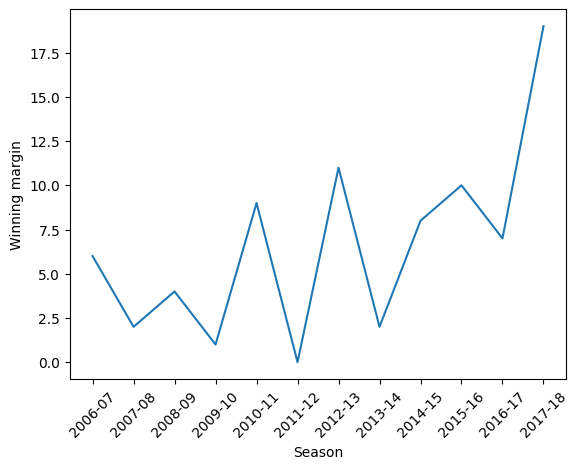

In [514]:
plt.plot(champions.Season,champions.Winning_margin)
plt.xlabel('Season')
plt.ylabel('Winning margin')
plt.xticks(rotation=45)
plt.show()

The last season of Manchester City indeed appears to be a significant outlier, showcasing their exceptional dominance. Additionally, the Premier League seems to adjust in response to dominating teams. After a season of strong domination, we observe a subsequent season with a very narrow winning margin for the eventual champion, indicating that the rest of the league catches up and becomes more competitive. This trend suggests a dynamic and competitive nature of the Premier League, making it a captivating subject for further analysis and exploration.

Let's create a bar chart to visualize the amount of games each champion wins and how that is different to the runner up and the third placed teams.

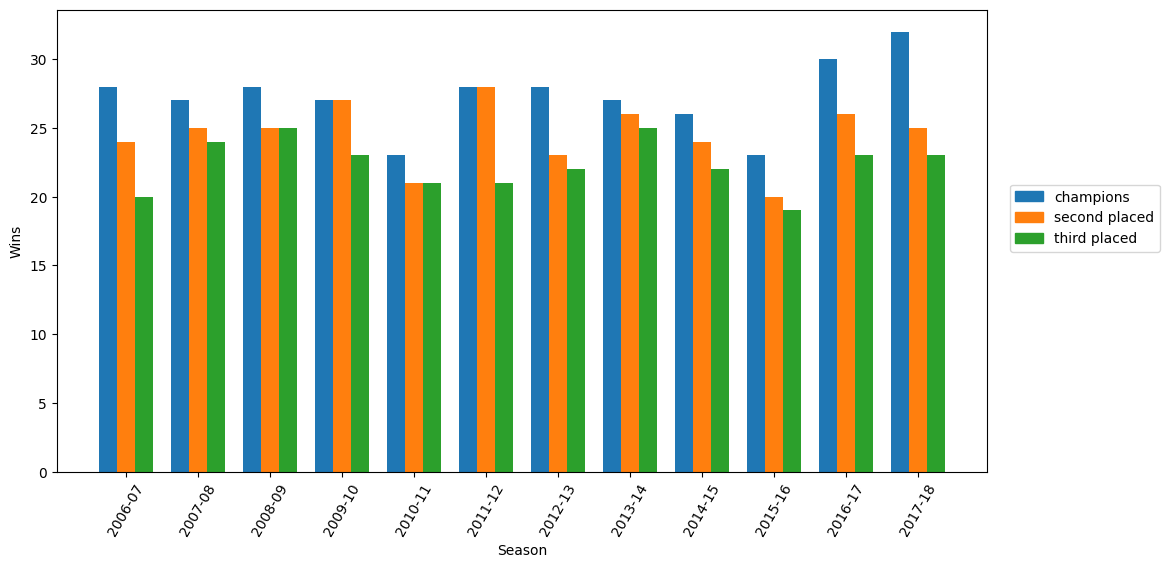

In [515]:
barWidth=0.25
fig = plt.subplots(figsize =(12, 6))

br1 = np.arange(len(champions.W))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br1,champions.W,width = barWidth)
plt.bar(br2,second_placed.W,width = barWidth)
plt.bar(br3,third_placed.W,width = barWidth)


plt.xlabel('Season')
plt.ylabel('Wins')
plt.xticks([r + barWidth for r in range(len(champions.W))],
        champions.Season.tolist())
plt.xticks(rotation =60)
colors = {'champions':'tab:blue', 'second placed':'tab:orange', 'third placed':'tab:green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,bbox_to_anchor=(1.05, 0.6),
           bbox_transform=plt.gcf().transFigure)
plt.show()

During the three-year period from 2009-10 to 2011-12, the Premier League exhibited exceptional competitiveness, as evidenced by the minimal difference in total wins among teams. These seasons likely garnered significant viewership, as the close competition and parity among teams make for captivating football spectacles.

Another notable observation is the narrow gap in wins between the top three teams from 2013-14 to 2015-16. During this period, the differences in wins were relatively small, showcasing a highly competitive race for the title. However, over the subsequent seasons, we witness a significant expansion in these differences. This shift can possibly be attributed to the arrival and influence of some of Europe's finest managers, such as Jurgen Klopp at Liverpool and Pep Guardiola at Manchester City. Their strategic brilliance and team-building efforts have led to their teams' dominant performances, making them forces to be reckoned with in the league.

### Mentioning domination, which teams actually won the league the most during this timespan?

To answer the question we neeed to count how many times a team has won the title.

In [516]:
times_champion = champions.Team.value_counts()
teams = times_champion.index.to_list()

Let's plot a pie chart with the percentages of title wins and the team colors of every team.\
(Sorry Leicester fans, there's just too much blue in there that's why you're in your away colors.)

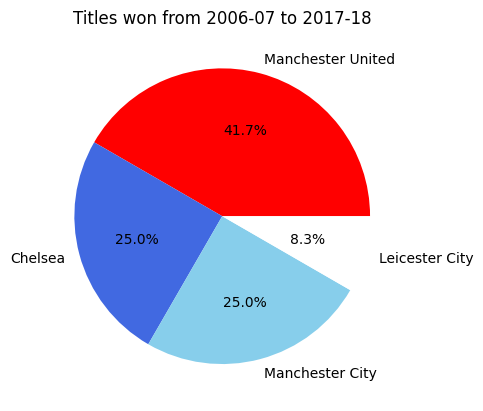

In [518]:
plt.pie(times_champion,
    labels = teams,
    autopct ='%1.1f%%',
    colors = ['red','royalblue','skyblue','white'])
plt.title('Titles won from 2006-07 to 2017-18')
plt.show()

Manchester United's dominance is quite noticeable but we have seen that it hasn't continued since 12-13.\
Possible reason for that is the retirement of their legendary manager sir Alex Ferguson

On the field, what makes a champion? Especially as dominant as Man United.\
Barring the obvious which is goals can we make any other assumptions regarding what influences wins? \
Can we interpret some of the football philosophies played in the English game and which is more successful?

Let's look at the correlations of all the stats data that we have for that period of time.

In [519]:
stats.corr()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,...,-0.299222,0.701707,-0.228135,0.208196,0.702131,0.704645,-0.316998,-0.032365,-0.162252,0.007351
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,...,0.313923,-0.646837,0.204358,-0.226708,-0.673469,-0.656575,0.293553,0.017236,0.147711,-0.010721
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,...,-0.258272,0.730479,-0.275572,0.216077,0.737691,0.733838,-0.268003,-0.000698,-0.222321,0.017450
total_yel_card,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,...,0.171979,-0.216048,0.137093,-0.144025,-0.240047,-0.246781,-0.047345,-0.014418,0.094843,-0.073962
total_red_card,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,...,0.174909,-0.107723,-0.116108,0.020976,-0.090034,-0.067673,0.112337,0.062797,0.037623,0.089275
total_scoring_att,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,...,-0.281627,0.642285,-0.335641,0.363540,0.794554,0.711154,-0.174188,-0.003246,-0.101241,0.138381
ontarget_scoring_att,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,...,-0.279921,0.732246,-0.341806,0.257334,0.786692,0.767850,-0.225950,-0.005862,-0.166715,0.096687
hit_woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,...,-0.220844,0.529739,-0.227261,0.170618,0.536658,0.531672,-0.128247,0.042172,-0.178729,-0.049829
att_hd_goal,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,...,-0.062554,0.170387,-0.037376,0.299689,0.296625,0.173216,-0.075413,0.017676,-0.048019,-0.115129
att_pen_goal,0.398314,-0.379356,0.492004,-0.095150,0.038967,0.353282,0.395763,0.191067,0.132276,1.000000,...,-0.166240,0.233146,-0.105929,0.056393,0.332663,0.244434,-0.094283,0.020114,-0.017222,0.127869


In football, the number of wins is influenced by various factors, and we are particularly interested in exploring the correlations between wins and certain metrics. Among the metrics we have selected for analysis are "touches," "passes," and "clean sheets."

In the world of football, two main philosophies govern the playing styles of teams: attacking and defensive football. Defensive football involves a more cautious approach, often characterized by sitting deep and relying on long balls and crosses. On the other hand, attacking football emphasizes possession and passing, with a focus on ball control and creative plays.

Interestingly, defensive teams tend to struggle in keeping clean sheets, as they often concede more goals due to their deeper positioning and lower possession. On the other hand, attacking teams, which tend to emphasize passes and touches, often manage to keep clean sheets and have a stronger correlation with wins.

Let's visualize the relationships between wins and these metrics using scatter plots to gain further insights.

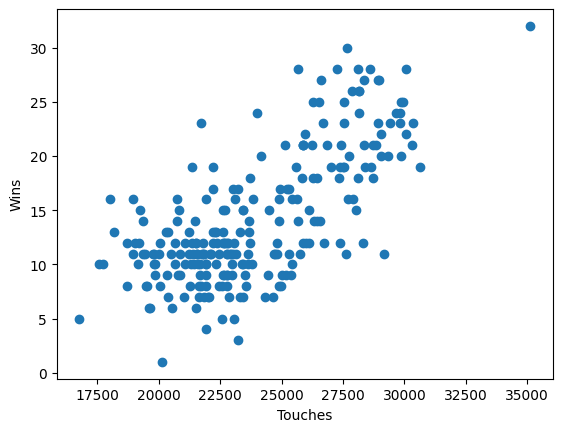

In [520]:
plt.scatter(stats.touches, stats.wins)
plt.xlabel('Touches')
plt.ylabel('Wins')
plt.show()

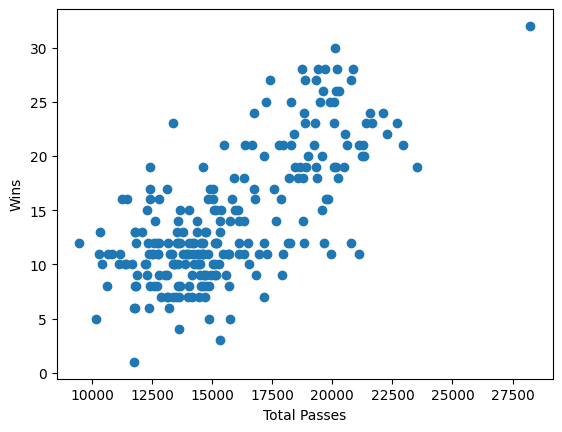

In [521]:
plt.scatter(stats.total_pass, stats.wins)
plt.xlabel('Total Passes')
plt.ylabel('Wins')
plt.show()

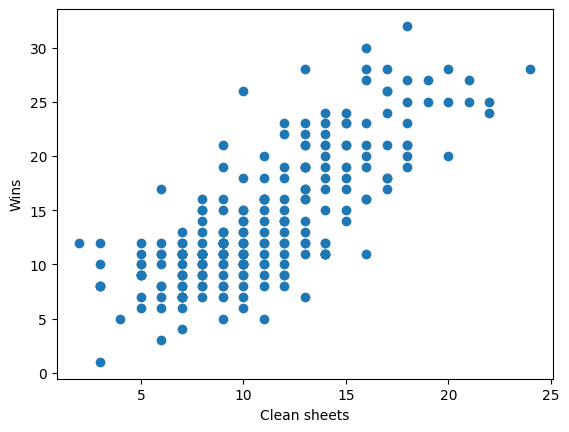

In [522]:
plt.scatter(stats.clean_sheet, stats.wins)
plt.xlabel('Clean sheets')
plt.ylabel('Wins')
plt.show()

We observe strong positive correlations with all scatter plots.

# Modelling

Defining the target variable 'y' as the number of wins, and creating the feature set 'X' by dropping the 'wins', 'season', and 'team' columns from the original dataset 'stats'.

In [524]:
y = stats['wins']

X = stats.drop(['wins','season','team'],axis = 1)

Observing the shape of the two.

In [525]:
print(y.shape)

(240,)


In [526]:
print(X.shape)

(240, 33)


To evaluate the accuracy of our model, we need to split the data into two sets: the training set and the test set. We can achieve this using the `train_test_split` function. To ensure consistency in the test split across different runs, we set a random state, which fixes the randomization.

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Okay,all set. Now we need a regressor - in our case we want to conduct a linear regression so we are using LinearRegression() from sklearn.

In [528]:
regressor = LinearRegression()

Now we need to fit the line to our training data. Barring no errors we shall get a single output - LinearRegression()

In [529]:
regressor.fit(X_train, y_train)

LinearRegression()

Here, we are using our trained linear regression model (`regressor`) to make predictions on the test set (`X_test`). The predicted values are stored in `y_pred`, which we can later use to compare with the actual target values (`y_test`) to assess the performance of our model.

In [416]:
y_pred = regressor.predict(X_test)

Now let's create a new dataframe to compare the results!

In [530]:
actual_predicted = pd.DataFrame({'Actual wins': y_test.squeeze(), 'Predicted wins': y_pred.squeeze()}).reset_index(drop=True)
actual_predicted.head()

,Actual wins,Predicted wins
0,19.0,18.945179
1,16.0,14.906297
2,11.0,14.937863
3,13.0,11.139628
4,19.0,16.901664


We can see that the model isn't entirely accurate. We can evaluate the model in four different ways:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- .score on the model or R Squared

Let's calculate those with the help of sklearn.

In [531]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [532]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.50
Mean squared error: 3.09
Root mean squared error: 1.76


The performance metrics we calculated indicate how well our linear regression model is fitting the data. A lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) suggest that our model is making predictions that are closer to the actual values. In the context of predicting wins, a difference of 4.05 may be significant, but considering that a team plays 38 games in a season, it is relatively acceptable.

Now, let's evaluate our model using the R-squared (R2) score. The R2 score measures the proportion of variance in the target variable (wins) that is predictable from the input features. A value closer to 1 indicates that the model is explaining a large portion of the variance in wins, while a value closer to 0 means that the model is not capturing the patterns well.

By checking the R2 score, we can gain further insights into how well our model is performing and how much of the variability in wins it can explain.

In [430]:
regressor.score(X_test, y_test)

0.8568252003050432

The R-squared (R2) score of our linear regression model on the test dataset is approximately 0.857. This indicates that about 85.7% of the variance in the number of wins for the Premier League teams can be explained by the features (X_test) used in the model. In other words, the model is performing well and is able to capture a significant portion of the patterns and trends in the data, making it a relatively good fit for predicting the number of wins based on the selected features.

Let's compare the actual vs. predicted prices with a plot.

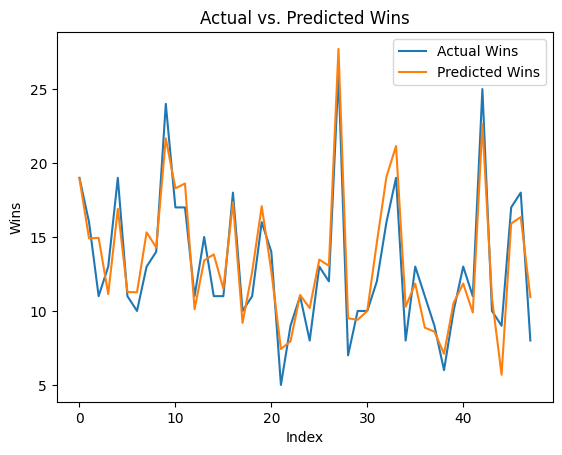

In [533]:
import matplotlib.pyplot as plt

# Create a line plot for actual wins
plt.plot(actual_predicted.index, actual_predicted['Actual wins'], label='Actual Wins')

# Create a line plot for predicted wins
plt.plot(actual_predicted.index, actual_predicted['Predicted wins'], label='Predicted Wins')

plt.xlabel('Index')
plt.ylabel('Wins')
plt.title('Actual vs. Predicted Wins')
plt.legend()
plt.show()

It seems like the models does a decent job of predicting the actual wins.
Let's plot the classic linear regression plot - the line plot.

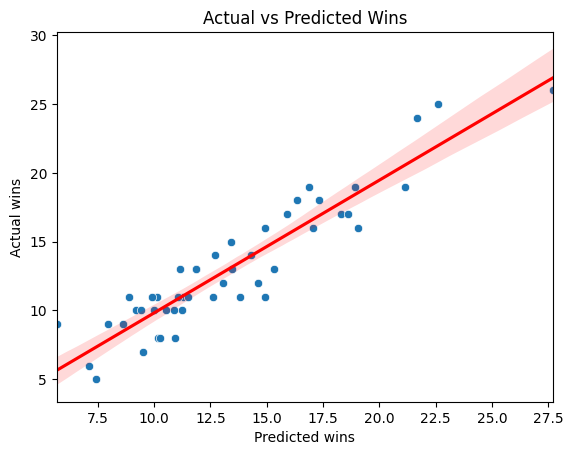

In [534]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter plot
sns.scatterplot(x='Predicted wins', y='Actual wins', data=actual_predicted)

# Add the regression line
sns.regplot(x='Predicted wins', y='Actual wins', data=actual_predicted, scatter=False, color='red')

# Set the axis labels and title
plt.xlabel('Predicted wins')
plt.ylabel('Actual wins')
plt.title('Actual vs Predicted Wins')

# Show the plot
plt.show()

The red area between the regression line and the scatter points in the plot represents the confidence interval for the regression line.

In linear regression, the regression line represents the best-fit line that minimizes the sum of the squared distances between the observed data points and the predicted values. However, there is uncertainty associated with estimating the true population regression line based on a sample of data.

The confidence interval provides a range of plausible values for the true population regression line with a certain level of confidence. The shaded red area represents this uncertainty and indicates the range within which the true regression line is likely to fall.

The width of the confidence interval depends on several factors, including the variability of the data and the sample size. A wider confidence interval indicates more uncertainty in estimating the true regression line, while a narrower interval suggests greater confidence in the estimate.

The confidence interval helps assess the reliability of the regression line and provides a visual representation of the uncertainty in the predictions. It highlights the potential variability in the relationship between the predictor variable and the response variable.

Now, relative to the data, let's try and answer the question what makes a champion with observing the feature importance.

In [535]:
feature_importance = pd.Series(regressor.coef_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

goals                   1.150184
clean_sheet             0.228201
total_red_card          0.197538
pen_goals_conceded      0.141697
penalty_save            0.111185
att_freekick_goal       0.062252
ontarget_scoring_att    0.019642
clearance_off_line      0.017035
punches                 0.014700
total_yel_card          0.014318
last_man_tackle         0.003645
total_cross             0.000488
total_long_balls        0.000410
total_high_claim        0.000282
total_clearance         0.000198
touches                 0.000166
total_pass             -0.000248
interception           -0.002759
total_tackle           -0.003092
total_scoring_att      -0.004386
corner_taken           -0.007900
outfielder_block       -0.008276
total_offside          -0.010143
hit_woodwork           -0.013100
goal_fastbreak         -0.016428
att_hd_goal            -0.048575
own_goals              -0.048848
losses                 -0.104538
goals_conceded         -0.109290
att_pen_goal           -0.117838
penalty_co

The feature importance analysis reveals the impact of various statistical categories on the number of wins for Premier League teams. Positive coefficients indicate features that positively influence the number of wins, while negative coefficients indicate features with a negative influence.

The most significant positive factors are:

- Goals: Having a higher number of goals scored positively affects the number of wins.
- Clean Sheet: Keeping a clean sheet, meaning not conceding any goals, has a significant positive impact on winning games.
- Total Red Cards: Having fewer red cards improves the chances of winning.
- Penalties Goals Conceded: Conceding fewer penalty goals is associated with more wins.
- Penalty Save: Making saves during penalty kicks positively affects the number of wins.  

On the other hand, the most significant negative factors are:

- Attacking Goals from Outside the Box (att_obox_goal) and Inside the Box (att_ibox_goal): Teams with fewer goals from these positions tend to win more.
- Total Long Balls and Total Pass: Excessive reliance on long balls and fewer total passes have a negative impact on the number of wins.
- Attacking Penalties Goals (att_pen_goal) and Penalties Conceded (penalty_conceded): Teams that score and concede more penalties tend to win fewer matches.

In [536]:
assert_is_not_none(X)
assert_is_not_none(y)
assert_is_not_none(regressor)
assert_is_not_none(mae)
assert_is_not_none(mse)
assert_is_not_none(rmse)
assert_is_not_none(y_pred)
assert_greater(regressor.score(X_test, y_test), 0)
assert_less_equal(regressor.score(X_test, y_test), 1)